In [4]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10   # Time and Hz, i.e. labels
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15  # Time(x) tick values
plt.rcParams['ytick.labelsize'] = 15  # Hz(y) tick values
plt.rcParams['legend.fontsize'] = 17
plt.rcParams['figure.titlesize'] = 10
plt.rcParams['axes.titlesize'] = 14   # Title font

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

%matplotlib inline
PI2 = np.pi * 2

import soundcard as sc
import IPython.display as ipd

from constants import *

# get a list of all speakers:
speakers = sc.all_speakers()
# get the current default speaker on your system:
default_speaker = sc.default_speaker()
# get a list of all microphones:
mics = sc.all_microphones()
# get the current default microphone on your system:
default_mic = sc.default_microphone()

from main import make_spectrum

def freq2key(freq):
    frequencies = np.array(list(KEY_FREQUENCY_MAP_PIANO.values()))
    return FREQUENCY_KEY_MAP_PIANO[
        frequencies[
            np.argmin(
                np.abs(frequencies - freq)
                )
            ]
        ]

In [5]:
def autocorrelate(ys):
    N = len(ys)
    corrs = np.correlate(ys, ys, mode='same')
    lags = np.arange(-N//2, N//2)
    
    # Take only the positive half
    corrs = corrs[N//2:]
    return corrs

## Test autocorrelation on piano

In [14]:
def get_piano_audio():
    waves = {}
    for i in range(8):
        waves[f'c{i}'] = thinkdsp.read_wave(f'data/piano/c{i}.wav')
        waves[f'd{i}'] = thinkdsp.read_wave(f'data/piano/d{i}.wav')
    return waves

In [15]:
piano_waves = get_piano_audio()

In [16]:
piano_waves['c0'].make_audio()

In [19]:
c0.framerate

44100

No handles with labels found to put in legend.


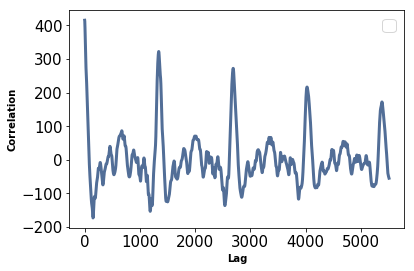

In [24]:
c0_corr = autocorrelate(piano_waves['c0'].ys[44100:44100+44100//4])

thinkplot.plot(c0_corr)
thinkplot.config(xlabel='Lag', ylabel='Correlation')#, ylim=[-1.05, 1.05])

In [25]:
low, high = 1000, 1500
lag = np.array(c0_corr[low:high]).argmax() + low
lag

1341

In [26]:
period = lag / 44100
period

0.030408163265306123

In [27]:
frequency = 1 / period
frequency

32.88590604026846

No handles with labels found to put in legend.


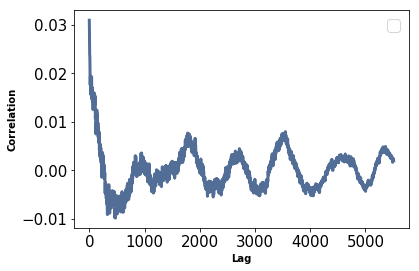

In [35]:
c7_corr = autocorrelate(piano_waves['c7'].ys[44100:44100+44100//4])

thinkplot.plot(c7_corr)
thinkplot.config(xlabel='Lag', ylabel='Correlation')#, ylim=[-1.05, 1.05])

No handles with labels found to put in legend.


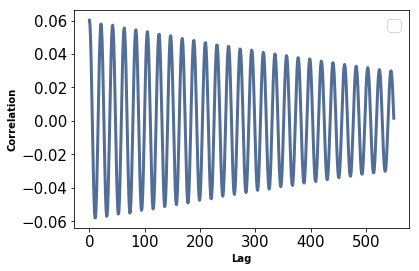

In [33]:
c6_corr = autocorrelate(piano_waves['c6'].ys[44100:44100+44100//40])

thinkplot.plot(c6_corr)
thinkplot.config(xlabel='Lag', ylabel='Correlation')#, ylim=[-1.05, 1.05])

No handles with labels found to put in legend.


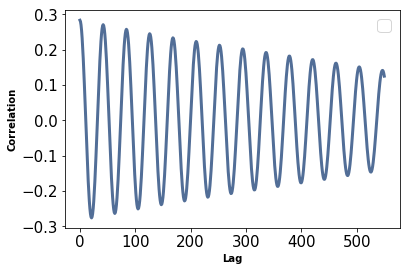

In [43]:
c5_corr = autocorrelate(piano_waves['c5'].ys[44100:44100+44100//40])

thinkplot.plot(c5_corr)
thinkplot.config(xlabel='Lag', ylabel='Correlation')#, ylim=[-1.05, 1.05])

No handles with labels found to put in legend.


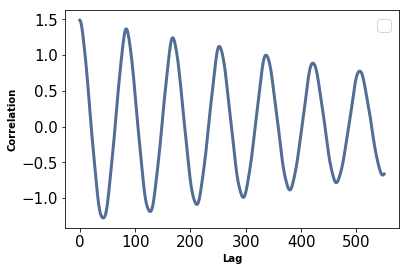

In [37]:
c4_corr = autocorrelate(piano_waves['c4'].ys[44100:44100+44100//40])

thinkplot.plot(c4_corr)
thinkplot.config(xlabel='Lag', ylabel='Correlation')#, ylim=[-1.05, 1.05])

No handles with labels found to put in legend.


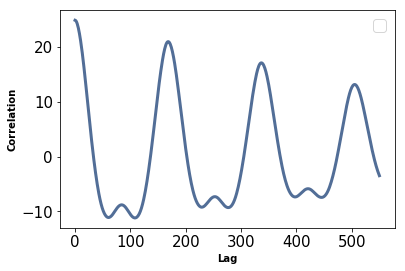

In [41]:
c3_corr = autocorrelate(piano_waves['c3'].ys[44100:44100+44100//40])

thinkplot.plot(c3_corr)
thinkplot.config(xlabel='Lag', ylabel='Correlation')#, ylim=[-1.05, 1.05])

No handles with labels found to put in legend.


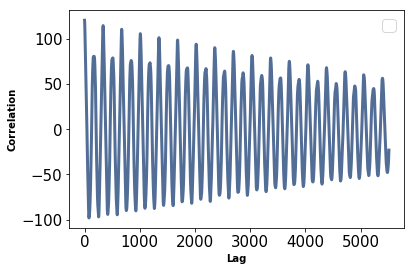

In [46]:
c2_corr = autocorrelate(piano_waves['c2'].ys[44100:44100+44100//4])

thinkplot.plot(c2_corr)
thinkplot.config(xlabel='Lag', ylabel='Correlation')#, ylim=[-1.05, 1.05])

No handles with labels found to put in legend.


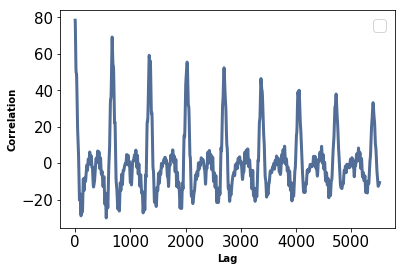

In [47]:
c1_corr = autocorrelate(piano_waves['c1'].ys[44100:44100+44100//4])

thinkplot.plot(c1_corr)
thinkplot.config(xlabel='Lag', ylabel='Correlation')#, ylim=[-1.05, 1.05])

In [40]:
ipd.Audio(piano_waves['c4'].ys[44100:44100+44100//40], rate=44100)

In [25]:
low, high = 1000, 1500
lag = np.array(c0_corr[low:high]).argmax() + low
lag

1341

In [26]:
period = lag / 44100
period

0.030408163265306123

In [27]:
frequency = 1 / period
frequency

32.88590604026846

In [ ]:
# Without ambient noise reduction
ys = wave[44100*2:]
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.plot(np.linspace(0, 1, num=44100), ys)

# Attenuate the initial noise
# ys[:int(44100*0.05)] = 0
# ax2.plot(np.linspace(0, 1, num=44100), ys)
spectrum = make_spectrum(ys, full=True)
spectrum.plot(linewidth=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 xlim=[50, 200])
frequency_fundamental = spectrum.fs[spectrum.amps.argmax()]

print(freq2key(frequency_fundamental), frequency_fundamental)
ipd.Audio(wave, rate=44100)